In [1]:
import numpy as np
from utilities import visualize_result, show, get_test_data
import matplotlib.pyplot as plt
from HopfieldNetwork import HopfieldNetwork, LearningRule, Mode
from data_manager import *
import datetime

In [70]:
random_seed = 599197 # datetime.datetime.now().microsecond
print(random_seed)
np.random.seed(seed=random_seed)
random_generator = np.random.default_rng(seed=random_seed)


height = 5
width = 5
neurons_count_n = height * width

random_image = np.random.choice([-1, 1], size=(height * width))
images = [random_image]

for i in range(0, 100):
#     print(i)
    generated_image = np.random.choice([-1, 1], size=(height * width))
    curr_images = np.vstack([images, generated_image])
    data = np.array(curr_images).T
   
    sample_count_m = len(images) + 1
    
    network = HopfieldNetwork(LearningRule.Hebb, Mode.Synchronous, data, sample_count_m, neurons_count_n, random_seed)
    T_Hebb = network.get_weights(0.001, 100)
    
    stable = True
    for image in curr_images:
        
        result = network.recognize(T_Hebb, np.copy(image), 1000)
        acc = np.sum(image == result) / neurons_count_n
        if acc < 1.0:
#             print("Not stable acc={0}".format(acc))
            stable = False
            break
    if stable:
        images.append(generated_image)
#         print("Images len: {0}".format(len(images)))

print("seed = {0}".format(random_seed))
print("no of images = {0}".format(len(images)))

599197
seed = 599197
no of images = 11


### Best score

In [32]:
print("seed = {0}".format(random_seed))
print("no of images = {0}".format(len(images)))

seed = 599197
no of images = 11


In [72]:
def plot_results(images, results, m, height, width, fig_height, fig_width, cmap_type='gray'):
    fig, axes = plt.subplots(2, m, figsize=(fig_width, fig_height)) 
    fig.patch.set_facecolor('white')
    fig.tight_layout()

    for i in range(0, m):
        
        axes[0, i].imshow(images[i].reshape(height, width), cmap=cmap_type)
        axes[1, i].imshow(results[i].reshape(height, width), cmap=cmap_type)
        
        for ax_i in axes:
            for ax_j in ax_i:
                ax_j.set_xticks([])
                ax_j.set_yticks([])
                ax_j.patch.set_edgecolor('black') 
                ax_j.patch.set_linewidth('2')
                
                
def get_results(data, sample_count_m, neurons_count_n, random_seed):
    results = []
    network = HopfieldNetwork(LearningRule.Hebb, Mode.Synchronous, data, sample_count_m, neurons_count_n, random_seed)
    T_Hebb = network.get_weights(0.001, 100)
    
    for i in range(sample_count_m):
        sample = np.reshape(data[:, i], (neurons_count_n, 1))
        
        result = network.recognize(T_Hebb, np.copy(sample), 1000)
        results.append(result)
    
    return results

11


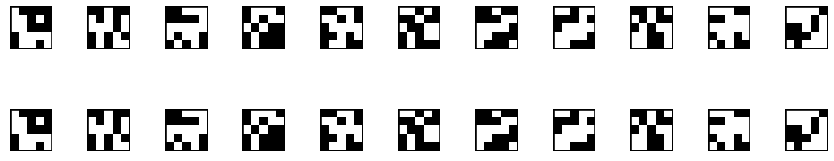

In [80]:
sample_count_m = len(images)
data_images = np.array(images).T
results = get_results(data_images, sample_count_m, neurons_count_n, random_seed)
print(sample_count_m)
plot_results(images, results, sample_count_m, height, width, 3, 12)